In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [4]:
# Data is here
f = "../data/test/yeast/analysis/ps.txt"
fpath = "/".join(f.split("/")[:-1])

In [5]:
# Read in file
df = pd.read_csv(f, sep = "\t")
df.head()

,Accession,Node:0,Node:1,Node:2,Node:3,Node:4,Seq:0,Seq:1,Seq:2,Seq:3,Seq:4
0,ABQ_6.ChrX,336,891,1785,6630,7655,47050,3792,12833,73540,597805
1,BIH_4.ChrX,278,764,1753,6592,7655,26389,2445,12195,73030,597805
2,ABF_6.ChrX,2180,1092,1204,5213,7655,33119,5968,12122,71557,597805
3,BPN_2.ChrX,1246,687,916,5163,7655,104349,5349,1650,9887,597805
4,BCK_8.ChrX,3275,948,1062,3734,7655,53334,4054,2600,67558,597805


In [6]:
# Sequence starts here
seq_index = [i for i, x in enumerate(list(df.columns)) if x.startswith("Seq")][0]
seq_index

6

In [7]:
# Data starts here
start_index = [i for i, x in enumerate(list(df.columns)) if x.startswith("Node")][0]+1
start_index

2

In [8]:
# Node stats
node_soft = df.apply(lambda x: sum([x for x in x.iloc[start_index:seq_index].values if not np.isnan(x)][1:-1]), axis = 1)
node_core = df.apply(lambda x: [x for x in x.iloc[start_index:seq_index].values if not np.isnan(x)][-1], axis = 1)
node_priv = df.apply(lambda x: [x for x in x.iloc[start_index:seq_index].values if not np.isnan(x)][0], axis = 1)
node_pan = df.apply(lambda x: sum([x for x in x.iloc[start_index:seq_index].values if not np.isnan(x)][:]), axis = 1)

In [9]:
df2 = pd.DataFrame([node_core, node_soft, node_priv]).T
df2.head()

,0,1,2
0,7655,8415,891
1,7655,8345,764
2,7655,6417,1092
3,7655,6079,687
4,7655,4796,948


In [10]:
# Change index and column name
df2.columns = ["Core", "Soft", "Private"]
df2.index = [x.split("_")[0] for x in df["Accession"]]
df2.head()

,Core,Soft,Private
ABQ,7655,8415,891
BIH,7655,8345,764
ABF,7655,6417,1092
BPN,7655,6079,687
BCK,7655,4796,948


In [11]:
df2.index = [x.split("#")[0] for x in df2.index]

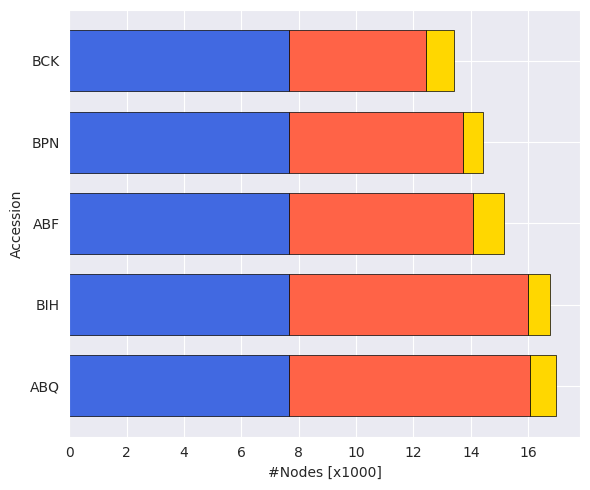

In [12]:
(df2/1000).plot(kind = "barh", stacked = True, figsize = (6,5), width = 0.75, legend = False,
                       edgecolor = "black",
                      linewidth = 0.5, 
                      color = ["royalblue", "tomato", "gold"])
plt.xlabel("#Nodes [x1000]")
plt.ylabel("Accession")
plt.tight_layout()
#plt.savefig("plots/ps.similarity_path.400.png", dpi = 400)
#plt.savefig("plots/ps.similarity_path.pdf")


In [13]:
seq_soft = df.apply(lambda x: sum([x for x in x.iloc[seq_index:].values if not np.isnan(x)][1:-1]), axis = 1)
seq_core = df.apply(lambda x: [x for x in x.iloc[seq_index:].values if not np.isnan(x)][-1], axis = 1)
seq_priv = df.apply(lambda x: [x for x in x.iloc[seq_index:].values if not np.isnan(x)][0], axis = 1)

In [14]:
df2 = pd.DataFrame([seq_core, seq_soft, seq_priv]).T
df2.head()

,0,1,2
0,597805,90165,47050
1,597805,87670,26389
2,597805,89647,33119
3,597805,16886,104349
4,597805,74212,53334


In [15]:
# Change index and column name
df2.columns = ["Core", "Soft", "Private"]
df2.index = [x.split("_")[0] for x in df["Accession"]]
df2.head()

,Core,Soft,Private
ABQ,597805,90165,47050
BIH,597805,87670,26389
ABF,597805,89647,33119
BPN,597805,16886,104349
BCK,597805,74212,53334


In [16]:
df2.index = [x.split("#")[0] for x in df2.index]

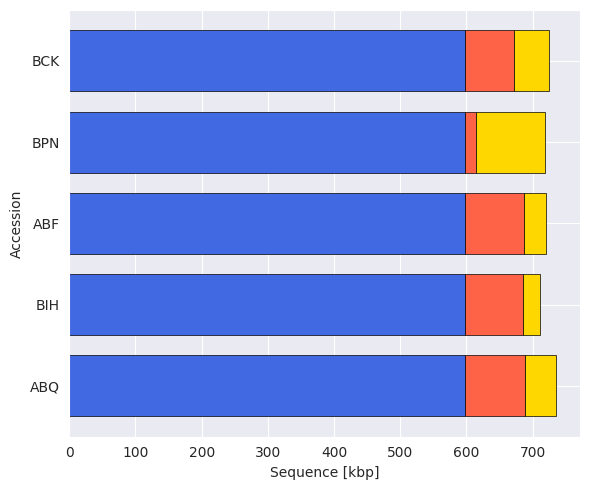

In [17]:
(df2/1000).plot(kind = "barh", stacked = True, figsize = (6,5), width = 0.75, legend = False,
                       edgecolor = "black",
                      linewidth = 0.5, 
                      color = ["royalblue", "tomato", "gold"])
plt.xlabel("Sequence [kbp]")
plt.ylabel("Accession")
plt.tight_layout()

#plt.savefig("plots/ps.similarity_path.seq.400.png", dpi = 400)
#plt.savefig("plots/ps.similarity_path.seq.svg")
